In [1]:
from process import *

In [2]:
import matplotlib.pyplot as plt

In [2]:
X, y = process_cov_and_merge_cov(merge_df(['Excitatory_Neur'], 2000))

In [10]:
X_test = X.loc[X['Disorder_Alzheimers/dementia'] == 1]
y_test = y.loc[X['Disorder_Alzheimers/dementia'] == 1]
X_train = X.loc[(X['Disorder_Control'] == 1) | (X['Disorder_control'] == 1)]
y_train = y.loc[(X['Disorder_Control'] == 1) | (X['Disorder_control'] == 1)]

In [12]:
list(X_test)

['Cohort_CMC',
 'Cohort_DevBrain',
 'Cohort_Girgenti-snMultiome',
 'Cohort_IsoHuB',
 'Cohort_LIBD',
 'Cohort_Ma_et_al',
 'Cohort_MultiomeBrain',
 'Cohort_PTSDBrainomics',
 'Cohort_ROSMAP',
 'Cohort_SZBDMulti-Seq',
 'Cohort_UCLA-ASD',
 'Cohort_Velmeshev_et_al',
 'Biological_Sex_female',
 'Biological_Sex_male',
 'Disorder_ASD',
 'Disorder_Alzheimers/dementia',
 'Disorder_Bipolar Disorder',
 'Disorder_Control',
 'Disorder_MDD',
 'Disorder_PTSD',
 'Disorder_Schizophrenia',
 'Disorder_Williams Syndrome',
 'Disorder_cognitive impairment',
 'Disorder_control',
 '1000G_ancestry_AFR',
 '1000G_ancestry_AMR',
 '1000G_ancestry_EAS',
 '1000G_ancestry_EUR',
 '1000G_ancestry_SAS',
 '1000G_ancestry_UNKNOWN',
 'Excitatory_Neur_GAPDH',
 'Excitatory_Neur_MIF',
 'Excitatory_Neur_PLCG2',
 'Excitatory_Neur_MTRNR2L12',
 'Excitatory_Neur_UBB',
 'Excitatory_Neur_HSPA8',
 'Excitatory_Neur_FTL',
 'Excitatory_Neur_SPDYE2',
 'Excitatory_Neur_C4orf48',
 'Excitatory_Neur_MTRNR2L1',
 'Excitatory_Neur_MT3',
 'Excitato

In [6]:
y

Individual_ID
CMC_MSSM_002     42.0
CMC_MSSM_033     81.0
CMC_MSSM_035     75.0
CMC_MSSM_036     82.0
CMC_MSSM_048     84.0
                 ... 
5939_BA9         21.0
5945_PFC_Nova    20.0
5958_BA9         22.0
5981_BA9_Nova    44.0
6033_BA9         14.0
Name: Age_death, Length: 352, dtype: float64

In [4]:
list(X)

['Cohort_CMC',
 'Cohort_DevBrain',
 'Cohort_Girgenti-snMultiome',
 'Cohort_IsoHuB',
 'Cohort_LIBD',
 'Cohort_Ma_et_al',
 'Cohort_MultiomeBrain',
 'Cohort_PTSDBrainomics',
 'Cohort_ROSMAP',
 'Cohort_SZBDMulti-Seq',
 'Cohort_UCLA-ASD',
 'Cohort_Velmeshev_et_al',
 'Biological_Sex_female',
 'Biological_Sex_male',
 'Disorder_ASD',
 'Disorder_Alzheimers/dementia',
 'Disorder_Bipolar Disorder',
 'Disorder_Control',
 'Disorder_MDD',
 'Disorder_PTSD',
 'Disorder_Schizophrenia',
 'Disorder_Williams Syndrome',
 'Disorder_cognitive impairment',
 'Disorder_control',
 '1000G_ancestry_AFR',
 '1000G_ancestry_AMR',
 '1000G_ancestry_EAS',
 '1000G_ancestry_EUR',
 '1000G_ancestry_SAS',
 '1000G_ancestry_UNKNOWN',
 'Excitatory_Neur_GAPDH',
 'Excitatory_Neur_MIF',
 'Excitatory_Neur_PLCG2',
 'Excitatory_Neur_MTRNR2L12',
 'Excitatory_Neur_UBB',
 'Excitatory_Neur_HSPA8',
 'Excitatory_Neur_FTL',
 'Excitatory_Neur_SPDYE2',
 'Excitatory_Neur_C4orf48',
 'Excitatory_Neur_MTRNR2L1',
 'Excitatory_Neur_MT3',
 'Excitato

In [20]:
filter_cell_types(get_list_of_prefix_from_dir('/gpfs/gibbs/pi/gerstein/jjl86/project/aging_YL/expression_matrix_24celltypes_07072023', '24'), '24', 250)

['L2.3.IT',
 'Oligo',
 'Astro',
 'L4.IT',
 'OPC',
 'Chandelier__Pvalb',
 'Sst__Sst.Chodl',
 'L5.IT',
 'L6.IT',
 'Vip']

In [3]:
intersect_of_all = get_index_intersect(
[
 'Chandelier.Pvalb',
 'Astro',
 'L5_IT',
 'Vip',
 'L2.3_IT', 'Sst.Sst_Chodl', 'Oligo' , 'L4_IT', 'L6_IT'], dataset_id = '21')

list_of_predictions, y_test, ret = predict([
 'Chandelier.Pvalb',
 'Astro',
 'L5_IT',
 'Vip',
 'L2.3_IT', 'Sst.Sst_Chodl', 'Oligo' , 'L4_IT', 'L6_IT'],
gene_num = 500, dataset_id='21', fixed_index = intersect_of_all, AD_model = False)

=======> Processing Chandelier.Pvalb
number of samples 154
number of genes 500


ValueError: x and y must have length at least 2.

In [88]:
y_test

Sample_ID
MSSM_282     88.0
CON13        68.0
SZ9          77.0
AN15451      16.0
UPIT13161    24.0
SZ19         79.0
MSSM_295     63.0
CON16        42.0
5576          2.0
1185          4.0
BD4          76.0
SZ10         42.0
CON5         36.0
BD19         85.0
CON21        58.0
2NA6         16.0
BD12         77.0
75QW         60.0
SZ22         61.0
PH2A         20.0
Name: Age_death, dtype: float64

In [95]:
ret.set_index('Celltype')

,Pearson Correlation,Spearman Correlation,RMSE,MAE,number of samples,number of genes
Celltype,,,,,,
Chandelier.Pvalb,0.854053,0.790913,16.230066,14.235510,202,1000
Astro,0.878210,0.807918,13.526468,11.157320,197,1000
L5_IT,0.866027,0.807674,14.430359,11.816718,210,1000
Vip,0.829436,0.691756,17.604300,14.551717,199,1000
L2.3_IT,0.931110,0.864783,9.732429,8.281871,218,1000
Sst.Sst_Chodl,0.769452,0.786921,17.432721,14.722360,190,1000
Oligo,0.922081,0.909581,11.497295,8.774693,207,1000
L4_IT,0.875793,0.857088,13.829233,11.102013,206,1000
L6_IT,0.867144,0.763042,13.116852,9.729114,185,1000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ret = ret.set_index('Celltype')
ret = ret.sort_values('Spearman Correlation')

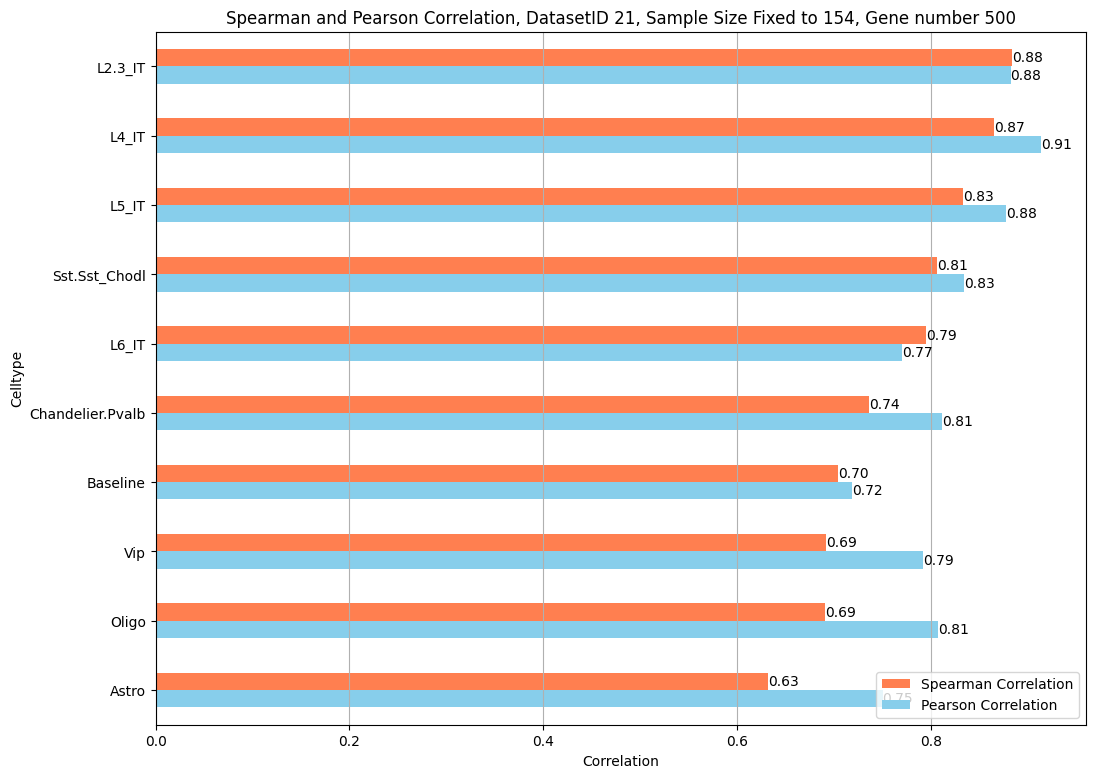

In [7]:
def reorderLegend(ax=None,order=None,unique=False):
    if ax is None: ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0])) # sort both labels and handles by labels
    if order is not None: # Sort according to a given list (not necessarily complete)
        keys=dict(zip(order,range(len(order))))
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t,keys=keys: keys.get(t[0],np.inf)))
    if unique:  labels, handles= zip(*unique_everseen(zip(labels,handles), key = labels)) # Keep only the first of each handle
    ax.legend(handles, labels, loc = 'lower right')
    return(handles, labels)

def unique_everseen(seq, key=None):
    seen = set()
    seen_add = seen.add
    return [x for x,k in zip(seq,key) if not (k in seen or seen_add(k))]
 

fig, ax = plt.subplots(figsize=(12, 9))
ret[['Pearson Correlation', 'Spearman Correlation', ]].plot(kind='barh', color=['skyblue', 'coral'], ax=ax)
ax.legend()
ax.set_xlabel('Correlation')
sample_num = list(set(ret['number of samples']))
gene_num = list(set(ret['number of genes']))
sample_num_str = f'Fixed to {sample_num[0]}' if len(sample_num) == 1 else 'Unfixed' 
ax.set_title(f'Spearman and Pearson Correlation, DatasetID 21, Sample Size {sample_num_str}, Gene number {gene_num[0]}')
ax.grid(axis='x')


# Add numeric labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Add the number of samples as text annotations next to the cell types
if len(sample_num) != 1:
    for i, cell_type in enumerate(ret.index):
        num_samples = ret.loc[cell_type, "number of samples"]
        ax.text(1, i, f' ({num_samples})', va='center', ha='left', transform=ax.get_yaxis_transform(), color='red')

reorderLegend(ax,['Spearman Correlation', 'Pearson Correlation'])
# Save the plot as a PDF file
plt.savefig('correlation.pdf', format='pdf')
plt.show()
# plt.close()

In [5]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [3]:
list_of_predictions, y_test 

([array([20.833857, 46.49036 , 49.730022, 73.80896 , 63.45993 , 44.093277,
         20.8077  , 49.227   , 19.49154 , 70.21092 , 19.215063, 28.176033,
         23.19623 , 79.92639 , 22.271645, 30.44974 , 86.84626 , 60.548748,
         32.62368 , 77.05575 , 24.064718, 74.20751 , 44.635006, 63.23279 ,
         35.768307, 82.62165 , 52.65584 , 44.54035 , 53.89826 , 67.875404,
         78.37313 , 45.168777, 59.18448 , 51.11286 , 53.653526, 81.54712 ,
         61.764946, 48.986397, 48.769863, 81.095474, 70.95949 , 19.820398,
         38.707012, 26.68937 , 17.136505, 20.481554, 71.487366],
        dtype=float32),
  array([26.089409, 29.29531 , 53.272778, 61.879673, 79.35599 , 52.021606,
         39.257057, 36.262848, 27.689167, 60.05224 , 37.06196 , 49.614017,
         41.375664, 69.011284, 29.42132 , 59.504955, 56.364136, 57.49478 ,
         34.770836, 82.75655 , 33.23587 , 73.09962 , 30.7196  , 63.44796 ,
         49.89881 , 85.447556, 41.767727, 66.45285 , 41.530632, 69.25962 ,
         75

In [46]:
y_test.reset_index()['Age_death'].sort_values().index

Index([56, 63, 51, 34, 55, 70, 39, 18, 15, 41, 58, 40, 47, 28, 69,  0,  5, 37,
       29, 46, 25, 53, 30,  3, 31, 66, 21, 49, 14, 50, 42, 16, 33, 64, 61, 43,
       59, 26,  7, 19, 44, 17,  9, 12, 36, 60, 68,  8, 38, 65,  1, 13, 20, 54,
        6, 27, 67, 35, 10, 52, 48, 23, 62, 45,  2, 11,  4, 24, 32, 57, 22],
      dtype='int64')

In [49]:
list_of_predictions[0].shape

(70,)

In [106]:
sorted_values = [pred[y_test.reset_index()['Age_death'].sort_values().index] for pred in list_of_predictions]

/tmp/tmp.CEWaCIuREg/ipykernel_1680591/4009471779.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


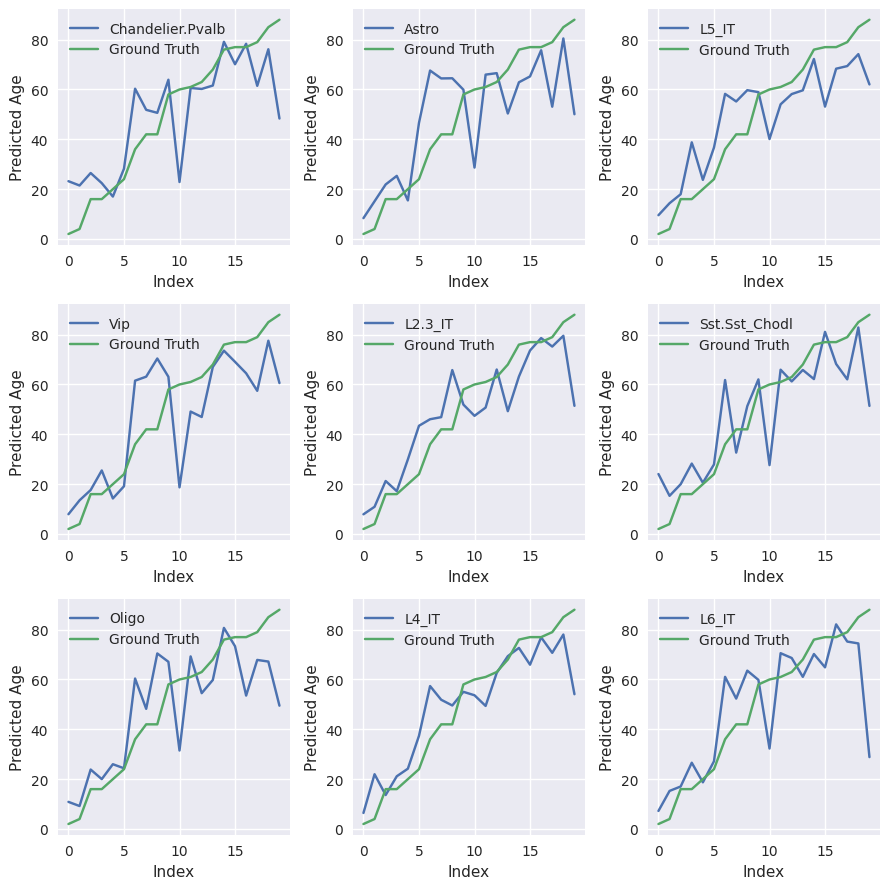

In [107]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
label = [
 'Chandelier.Pvalb',
 'Astro',
 'L5_IT',
 'Vip',
 'L2.3_IT', 'Sst.Sst_Chodl', 'Oligo' , 'L4_IT', 'L6_IT']
# Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 5))
n = len(sorted_values)

fig, axs = plt.subplots(3, 3, figsize=(9, 9))


for i, ax in enumerate(axs.flatten()):
    for j in range(1):
        index = i * 1 + j
        if index < n:
            ax.plot(sorted_values[index], label=f'{label[index]}')
            ax.legend(loc = 'upper left' )
        else:
            break
    ax.plot(np.array(y_test.reset_index()['Age_death'].sort_values()), label = 'Ground Truth')
    ax.legend(loc = 'upper left' )
    ax.set_xlabel('Index')
    ax.set_ylabel('Predicted Age')
    # Add a legend

    

plt.tight_layout()
plt.savefig('output.pdf')
plt.show()


# # Add title and labels
# ax.set_title('Predictions')
# ax.set_xlabel('Index')
# ax.set_ylabel('Prediction Value')



# # Show the plot
# plt.show()

array([15.        , 16.        , 16.        , 19.        , 19.        ,
       19.        , 20.        , 20.75      , 23.        , 24.        ,
       24.        , 28.        , 28.55578371, 30.        , 31.        ,
       34.        , 34.7       , 42.5269222 , 44.        , 46.37      ,
       47.00616016, 49.        , 49.02669405, 51.        , 51.73      ,
       52.        , 52.5       , 52.92      , 53.        , 57.62      ,
       58.        , 58.        , 58.        , 59.        , 61.54      ,
       66.        , 73.        , 75.        , 76.        , 76.8843258 ,
       79.        , 80.        , 81.        , 82.        , 85.        ,
       90.        , 90.        ])

In [22]:
len(intersect_of_all)

235

In [14]:
predict([
 'OPC',
 'Inhibitory_Neur',
 'Excitatory_Neur'], gene_num = 2000, fixed_index = intersect_of_all)

=======> Processing OPC
Pearson correlation: 0.845
Spearman correlation: 0.824
RMSE: 13.494
MAE: 10.330
=======> Processing Inhibitory_Neur
Pearson correlation: 0.830
Spearman correlation: 0.823
RMSE: 14.073
MAE: 10.925
=======> Processing Excitatory_Neur
Pearson correlation: 0.856
Spearman correlation: 0.853
RMSE: 13.037
MAE: 10.345


In [2]:
model, X_train, X_test, y_train, y_test = fit_model(*process_cov_and_merge_cov(merge_df([
 'Oligo',
 'PC',
 'Astro',
 'OPC',
 'Inhibitory_Neur',
 'Excitatory_Neur'], 2000)))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.6s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.3s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.3s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   9.7s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   9.6s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   9.8s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=500; total time=  23.2s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=500; total time=  23.1s
[CV] END colsample_bytree=0.3, gamma=0.0,

In [4]:
len(intersect_of_all) 

220

In [18]:
model, X_train, X_test, y_train, y_test  = predict([
'Sst__Sst.Chodl'], 2000, fixed_index = None, dataset_id = '24', grid_search_cv = 0)


=======> Processing Sst__Sst.Chodl
number of samples 278
number of genes 2000
Pearson correlation: 0.759
Spearman correlation: 0.732
RMSE: 16.624
MAE: 13.511


In [5]:
 X, y = process_cov_and_merge_cov(merge_df([
 'Oligo',
 'PC',
 'Astro',
 'OPC',
 'Inhibitory_Neur',
 'Excitatory_Neur'], 2000))

In [20]:
# argmax of index
feature_importance = model.feature_importances_

['Excitatory_NeurMKRN3',
 'Excitatory_NeurFKBP5',
 'Excitatory_NeurC6orf141',
 'Excitatory_NeurPPIA',
 'Excitatory_NeurPEF1',
 'Excitatory_NeurPZP',
 'Excitatory_NeurRGS14',
 'Excitatory_NeurAC243829.2',
 'Excitatory_NeurAL445207.1',
 'Excitatory_NeurTMEM271']

Indices of top 10 values: ['MKRN3' 'FXYD7' 'FADS3' 'ADAMTS9' 'PHF21B' 'ADAM12' 'HS3ST5' 'DCHS1'
 'FREM2' 'TSHZ2']
Top 10 values: [0.09452803 0.08806938 0.06404871 0.06003989 0.04729801 0.04223538
 0.03891259 0.03472453 0.03030933 0.02887553]


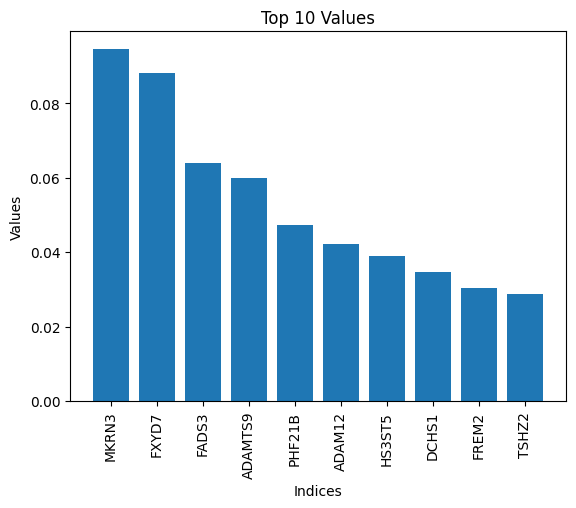

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly generate an array
np.random.seed(0)

# Get the indices of the top 10 values
top_10_indices = feature_importance.argsort()[-10:][::-1]

print("Indices of top 10 values:", np.array(list(X_train.iloc[:, top_10_indices])))
print("Top 10 values:", feature_importance[top_10_indices])

plt.bar(np.array(list(X_train.iloc[:, top_10_indices])), feature_importance[top_10_indices])
plt.xlabel('Indices')
plt.ylabel('Values')
plt.title('Top 10 Values')
plt.xticks(rotation='vertical')
plt.savefig('xgboost-feature-importance~Exci~YL~Jul8.pdf')

In [22]:
import shap
# model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


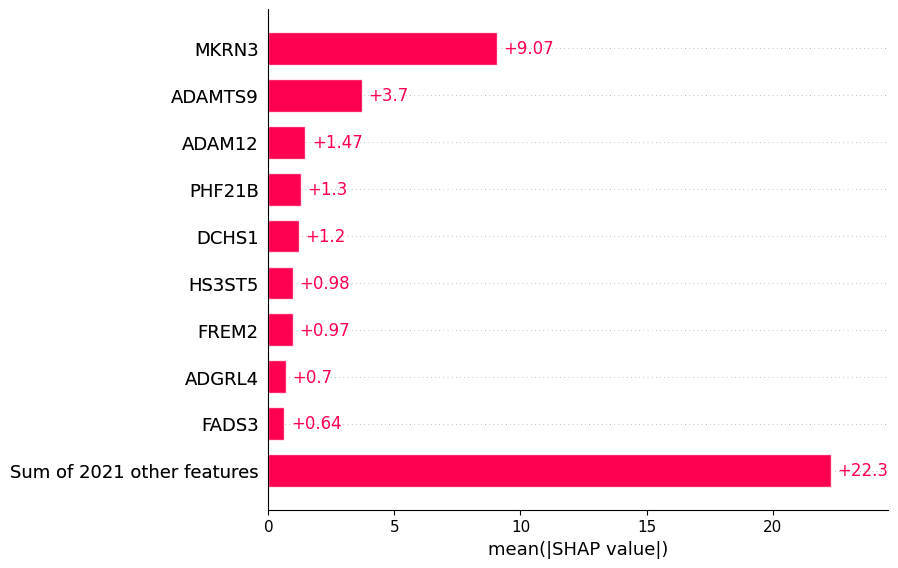

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values)
plt.savefig('xgboost-shap-feature-importance~Exci~YL~Jul9.pdf')

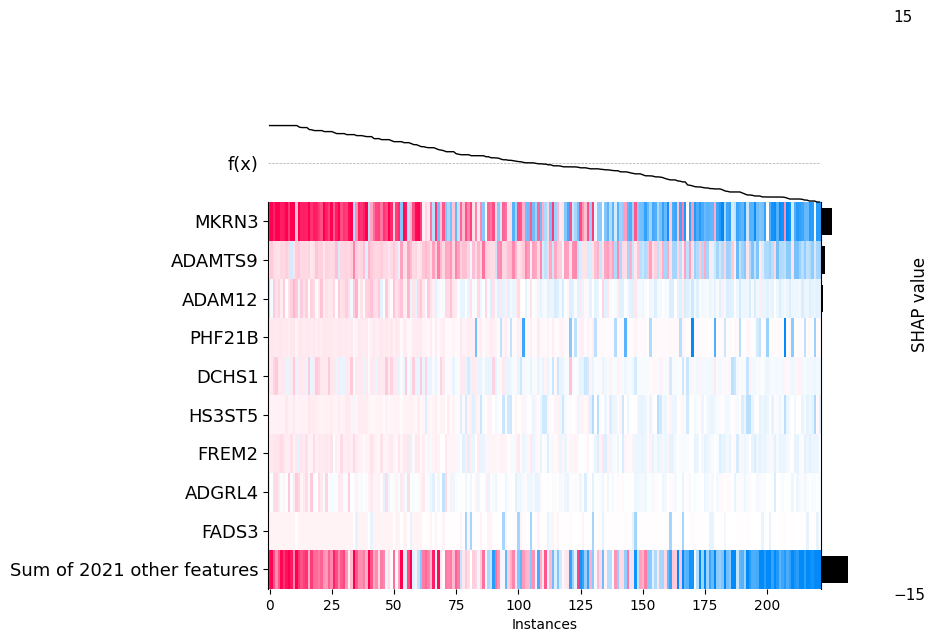

In [26]:
shap.plots.heatmap(shap_values, shap_values.sum(1))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


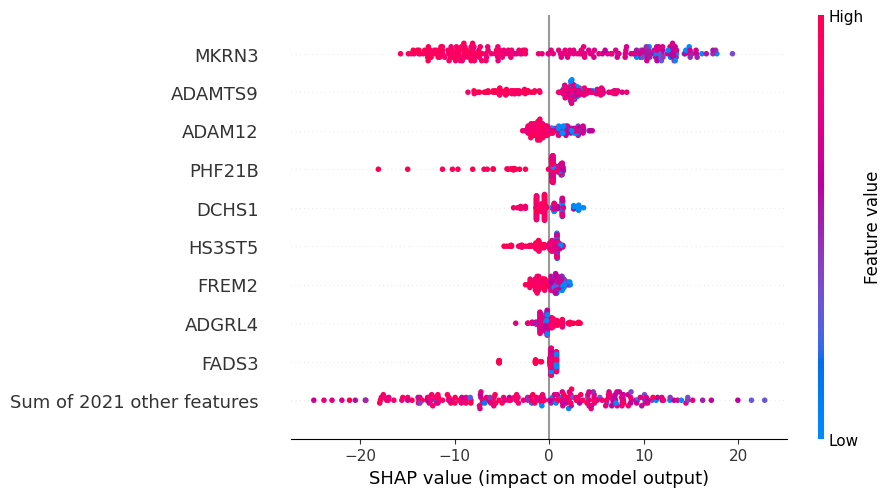

In [25]:
shap.plots.beeswarm(shap_values)

In [34]:

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y_new = pd.cut(y, bins).cat.codes


In [37]:
y_new.unique()

array([3, 7, 6, 5, 2, 4, 1, 0], dtype=int8)

In [38]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y_new)

In [39]:
X_train_cat = X_train.iloc[:, :30]
X_train_num = X_train.iloc[:, 30:]
X_val_cat = X_val.iloc[:, :30]
X_val_num = X_val.iloc[:, 30:]
X_test_cat = X_test.iloc[:, :30]
X_test_num = X_test.iloc[:, 30:]

In [42]:
import numpy as np
np.save('/home/yl2428/tab-ddpm/data/cell/y_val.npy', y_val)


In [46]:
np.load('/home/yl2428/tab-ddpm/data/cell/X_num_train.npy') == X_train_num

,Excitatory_NeurGAPDH,Excitatory_NeurMIF,Excitatory_NeurPLCG2,Excitatory_NeurMTRNR2L12,Excitatory_NeurUBB,Excitatory_NeurHSPA8,Excitatory_NeurFTL,Excitatory_NeurSPDYE2,Excitatory_NeurC4orf48,Excitatory_NeurMTRNR2L1,...,Excitatory_NeurRPS15,Excitatory_NeurRPS13,Excitatory_NeurRPS18,Excitatory_NeurLGALS1,Excitatory_NeurAC004594.1,Excitatory_NeurRPL18A,Excitatory_NeurRPS28,Excitatory_NeurP2RY14,Excitatory_NeurRPS17,Excitatory_NeurPDE5A
Individual_ID,,,,,,,,,,,,,,,,,,,,,
sc44,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
SZ18,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
JU7U,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5538_PFC_Nova,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
UMB5342,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CMC_MSSM_190,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
CMC_MSSM_321,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
SZ19,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [24]:
fit_model(X, y)

Pearson correlation: 0.758
Spearman correlation: 0.771
RMSE: 15.158
MAE: 11.764


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...),
                Cohort_CMC  Cohort_DevBrain  Cohort_Girgenti-snMultiome  \
 Individual_ID                                                            
 sc7                 False            False                       False   
 5577_BA9            Fal